#Домашнее задание 1


##Выбрать один из временных рядов из списка.
В качестве дата сета я выбрал shampoo_sales

In [1]:
!pip install -q arch pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.7/981.7 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 64.6 MB/s eta 0:00:00


In [2]:
import os
import sys

import numpy as np
import pandas as pd
import pandas_datareader.data as web

import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

import scipy.stats as scs
from arch import arch_model

import matplotlib as mpl
import matplotlib.pyplot as plt

In [42]:
DATA_PATH = "https://raw.githubusercontent.com/intsystems/MathematicalForecastingMethods/main/data/shampoo_sales.csv"

In [43]:
ts = pd.read_csv(DATA_PATH)

In [44]:
ts.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


##Визуализировать ACF и PACF.

In [58]:
sales = ts.Sales

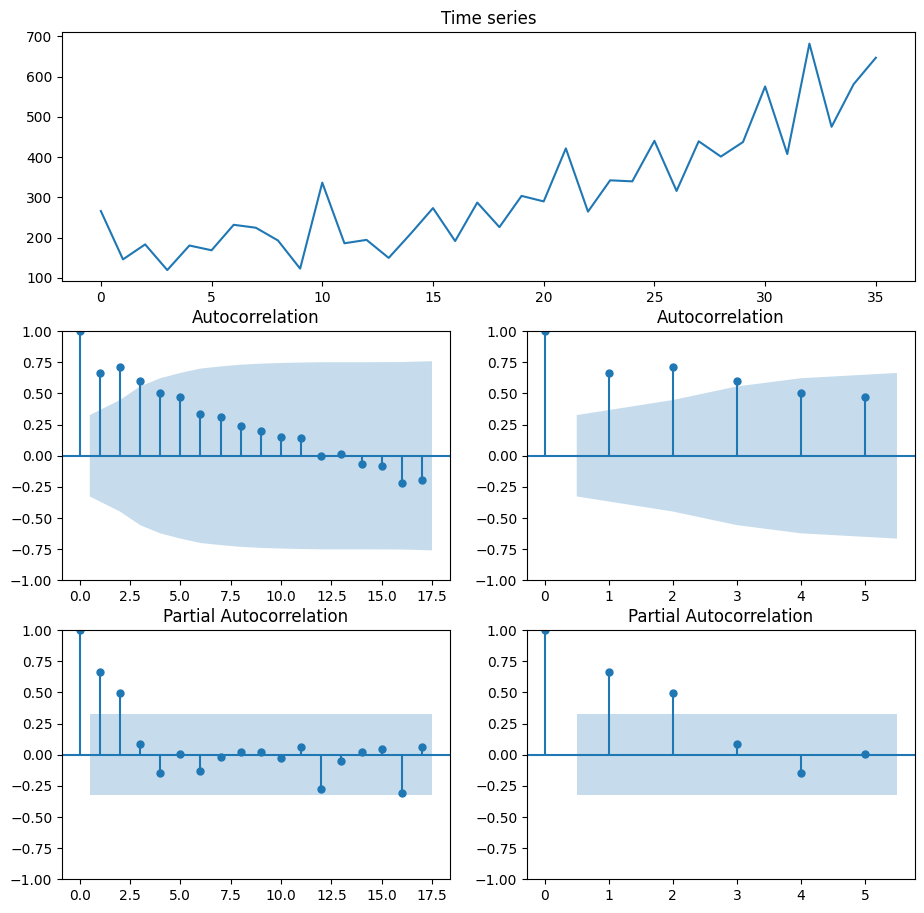

In [61]:
fig, axs = plt.subplots(3, 2, figsize = (11,11))
axs[0, 0].remove()
axs[0, 1].remove()

gs = axs[0, 0].get_gridspec()
axbig = fig.add_subplot(gs[0, :2])
axbig.plot(sales)
axbig.set_title('Time series')

smt.graphics.plot_acf(sales, lags=17, ax=axs[1,0], alpha=0.05)
smt.graphics.plot_pacf(sales, lags=17, ax=axs[2,0], alpha=0.05)

smt.graphics.plot_acf(sales, lags=5, ax=axs[1,1], alpha=0.05)
smt.graphics.plot_pacf(sales, lags=5, ax=axs[2,1], alpha=0.05)
plt.show()

Из верхнего графика можно сделать вывод что временной ряд не является стационарным, поэтому из него надо исключить тренд путем дифференцирования. Также по ACF и PACF можно найти сезонный порядок:
- Сезонный порядок Q = 3, P = 3.

In [93]:
ts_diff = np.diff(sales, n = 1)
ts_diff = np.diff(ts_diff, n = 4) #так как у нас данные распределены по месяцам

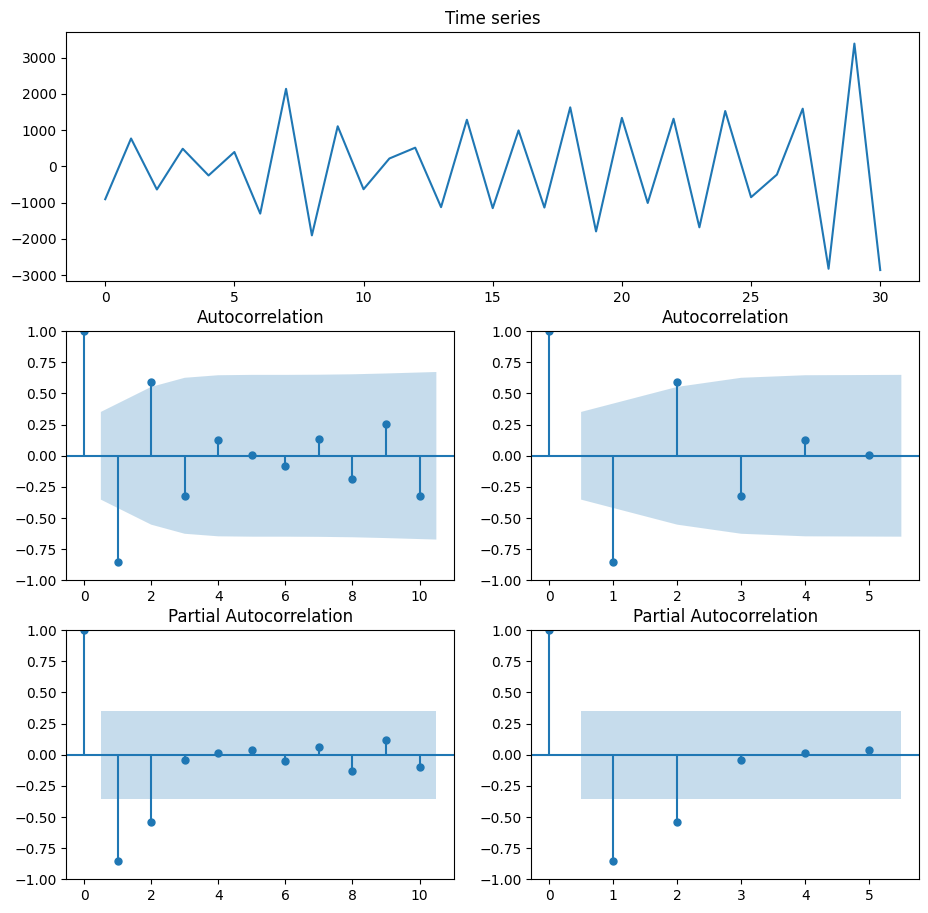

In [94]:
fig, axs = plt.subplots(3, 2, figsize = (11,11))
axs[0, 0].remove()
axs[0, 1].remove()

gs = axs[0, 0].get_gridspec()
axbig = fig.add_subplot(gs[0, :2])
axbig.plot(ts_diff[:500])
axbig.set_title('Time series')

smt.graphics.plot_acf(ts_diff, lags=10, ax=axs[1,0], alpha=0.05)
smt.graphics.plot_pacf(ts_diff, lags=10, ax=axs[2,0], alpha=0.05)

smt.graphics.plot_acf(ts_diff, lags=5, ax=axs[1,1], alpha=0.05)
smt.graphics.plot_pacf(ts_diff, lags=5, ax=axs[2,1], alpha=0.05)
plt.show()

Выводы:
1. p = 3
2. q = 2

##Построить и выбрать лучшую AR, ARMA, SARIMA модели.
Теперь по очереди обучим модели и сравним их результаты.
- Q = 3 q = 2
- P = 3 p = 3
- D = 1 d = 1

In [ ]:
#order=(3,1,2), seasonal_order=(3, 1, 3, 4)

In [114]:
from statsmodels.tsa.ar_model import AutoReg as AR
model_ar = AR(sales, lags = 3, trend = 'ct')
results_ar = model_ar.fit()

results_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   36
Model:                     AutoReg(3)   Log Likelihood                -182.464
Method:               Conditional MLE   S.D. of innovations             60.963
Date:                Thu, 26 Oct 2023   AIC                            376.928
Time:                        02:02:10   BIC                            385.907
Sample:                             3   HQIC                           379.949
                                   36                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.5496     29.158      0.568      0.570     -40.600      73.699
trend          7.9415      3.249      2.444      0.015       1.573      14.310
Sales.L1      -0.2384      0.176     -1.358      0.175      -0.583       0.106
Sales.L2       0.4457      0.156      2.850      0.004       0.139       0.752
Sales.L3       0.3091      0.163      1.897      0.058      -0.010       0.629
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2491           -0.0000j            1.2491           -0.0000
AR.2           -1.3455           -0.8830j            1.6093           -0.4076
AR.3           -1.3455           +0.8830j            1.6093            0.4076
-----------------------------------------------------------------------------
"""

In [111]:
from statsmodels.tsa.arima.model import ARIMA
model_arma = ARIMA(sales, order=(3,1,2))
results_arma = model_arma.fit()

results_arma.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(3, 1, 2)   Log Likelihood                -195.907
Date:                Thu, 26 Oct 2023   AIC                            403.815
Time:                        01:58:54   BIC                            413.147
Sample:                             0   HQIC                           407.036
                                 - 36                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0063      0.450     -0.014      0.989      -0.888       0.875
ar.L2         -0.1400      0.209     -0.669      0.503      -0.550       0.270
ar.L3         -0.2733      0.381     -0.717      0.473      -1.020       0.474
ma.L1         -1.2114     50.662     -0.024      0.981    -100.507      98.085
ma.L2          0.9996     83.630      0.012      0.990    -162.913     164.912
sigma2      3646.6273   3.05e+05      0.012      0.990   -5.94e+05    6.01e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 0.13
Prob(Q):                              0.88   Prob(JB):                         0.94
Heteroskedasticity (H):               1.31   Skew:                             0.13
Prob(H) (two-sided):                  0.65   Kurtosis:                         2.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [117]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_s = SARIMAX(sales, order=(3,1,2), seasonal_order=(3, 1, 3, 4))

results_s = model_s.fit()

results_s.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                         SARIMAX Results                                         
=================================================================================================
Dep. Variable:                                     Sales   No. Observations:                   36
Model:             SARIMAX(3, 1, 2)x(3, 1, [1, 2, 3], 4)   Log Likelihood                -176.897
Date:                                   Thu, 26 Oct 2023   AIC                            377.794
Time:                                           02:06:28   BIC                            395.002
Sample:                                                0   HQIC                           383.404
                                                    - 36                                         
Covariance Type:                                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3900     10.183     -0.137      0.891     -21.348      18.568
ar.L2         -0.8153     13.790     -0.059      0.953     -27.844      26.213
ar.L3         -0.0006      8.227  -7.32e-05      1.000     -16.125      16.123
ma.L1          0.2488     10.355      0.024      0.981     -20.047      20.545
ma.L2         -0.0495      2.182     -0.023      0.982      -4.325       4.226
ar.S.L4        0.6974      7.367      0.095      0.925     -13.742      15.137
ar.S.L8       -0.1468      3.817     -0.038      0.969      -7.629       7.335
ar.S.L12      -0.3785      1.592     -0.238      0.812      -3.498       2.741
ma.S.L4       -0.9890     38.277     -0.026      0.979     -76.010      74.032
ma.S.L8       -0.3265     16.562     -0.020      0.984     -32.788      32.135
ma.S.L12       0.6954     30.256      0.023      0.982     -58.606      59.996
sigma2      3494.4953   1.22e+05      0.029      0.977   -2.35e+05    2.42e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):                 0.47
Prob(Q):                              0.70   Prob(JB):                         0.79
Heteroskedasticity (H):               1.53   Skew:                             0.10
Prob(H) (two-sided):                  0.51   Kurtosis:                         2.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [119]:
import seaborn as sns

<Axes: xlabel='Log Likelihood', ylabel='Models'>

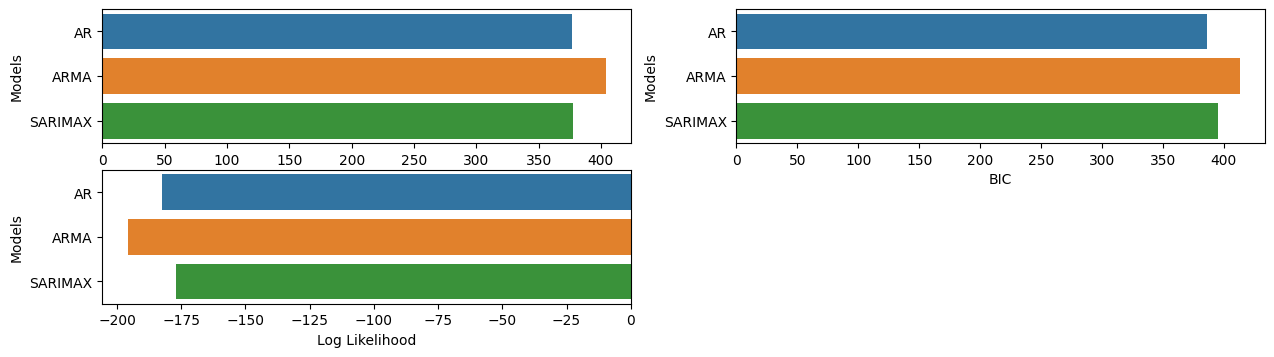

In [189]:
plt.figure(figsize=(15,8))
df = pd.DataFrame({'AIC':[results_ar.aic, results_arma.aic, results_s.aic],'Models':['AR','ARMA','SARIMAX']})
plt.subplot(4,2,1)
sns.barplot(data=df, x="AIC", y="Models")
df = pd.DataFrame({'BIC':[results_ar.bic, results_arma.bic, results_s.bic],'Models':['AR','ARMA','SARIMAX']})
plt.subplot(4,2,2)
sns.barplot(data=df, x="BIC", y="Models")
df = pd.DataFrame({'Log Likelihood':[results_ar.llf, results_arma.llf, results_s.llf],'Models':['AR','ARMA','SARIMAX']})
plt.subplot(4,2,3)
sns.barplot(data=df, x="Log Likelihood", y="Models")


##Памятка
AIC и BIC оценивают качество модели, учитывая ее соответствие данным и сложность модели. Чем меньше значение AIC или BIC, тем лучше модель.

Log likelihood (логарифмическая функция правдоподобия) - это метрика, которая оценивает вероятность того, что наблюдаемые данные могут быть получены из данной модели. Чем выше значение log likelihood, тем лучше модель.

**Вывод**:
По трем показателем лучше всего показала себя SARIMAX, хотя на данном сете она не намного лучше обычной AR модели (по метрики BIC она хуже)

#Тестирование
Попробуем протестировать модель SARIMAX разделив датасет

In [173]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = sales[:24]
test = sales[24:]

In [174]:
model_s = SARIMAX(train, order=(3,1,2), seasonal_order=(3, 1, 3, 4))
fitted = model_s.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


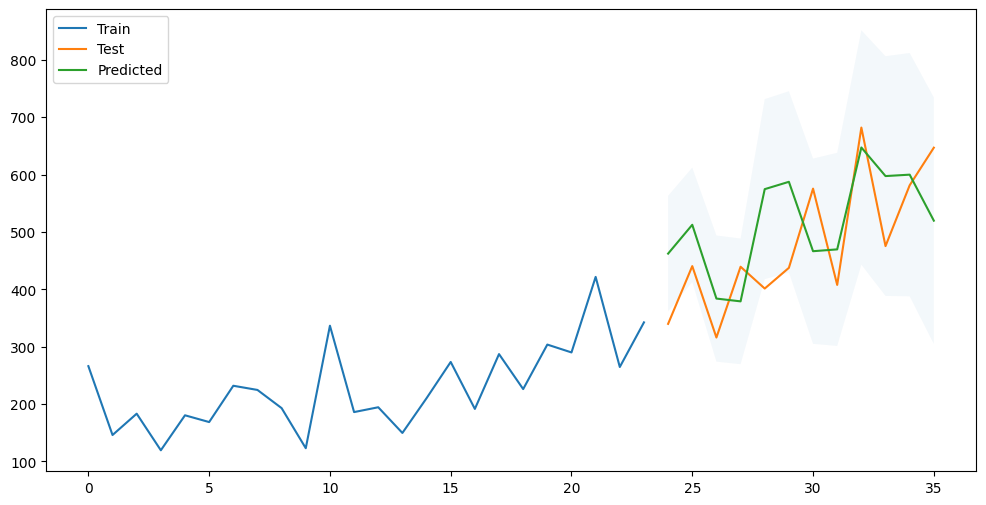

In [185]:
predictions = fitted.get_forecast(steps=len(test))

# Выводим предсказанные значения
predicted_values = predictions.predicted_mean

# Получаем доверительный интервал для предсказаний
confidence_intervals = predictions.conf_int()
dates = test.index

plt.figure(figsize=(12, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(dates, predicted_values, label='Predicted')
plt.fill_between(dates, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], alpha=0.05)
plt.legend(loc='upper left')
plt.show()

**Вывод**:

Модель уловила положительную динамику показателей продаж во времени, также пристуствует сезонность. В связи небольшим количеством данных, довольно сложно более удачно графически показать предсказывающую силу модели.

#К лучшей модели из предыдущих попробовать добавить GARCH

In [190]:
from arch import arch_model

In [209]:
residuals = fitted.resid
model_g = arch_model(residuals, vol='GARCH', p=1, q=1)
fitted_g = model_g.fit(disp='off')
fitted_g.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -138.208
Distribution:                  Normal   AIC:                           284.415
Method:            Maximum Likelihood   BIC:                           289.127
                                        No. Observations:                   24
Date:                Thu, Oct 26 2023   Df Residuals:                       23
Time:                        03:47:01   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            19.9180     13.953      1.427      0.153 [ -7.430, 47.266]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega      7.4741e-05     26.745  2.795e-06      1.000 [-52.419, 52.419]
alpha[1]   4.7716e-18  8.302e-02  5.748e-17      1.000 [ -0.163,  0.163]
beta[1]        0.9367      0.104      9.002  2.219e-19 [  0.733,  1.141]
========================================================================

Covariance estimator: robust
"""

**Вывод**:

Как видно по всем трем показателям, по которым мы сравнивали предыдущие модели, GARCH улучшила результат. Правда нужно учитывать тот факт, что модель обучалась на 60% данных. Поэтому еще посмотрим на результаты GARCH в SARIMAX обученной на 100%

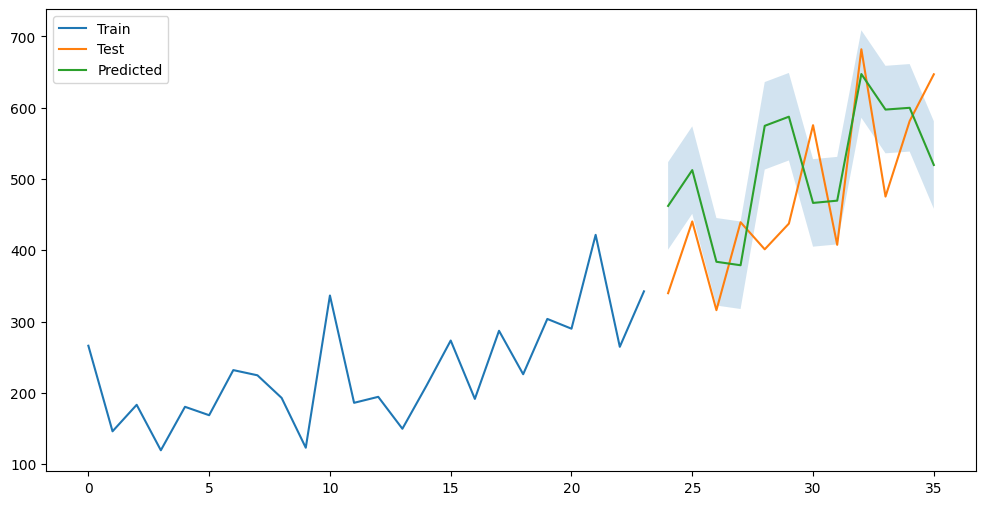

In [208]:
# Получаем предсказания дисперсии на тестовых данных
predictions_g = fitted_g.forecast(horizon=len(test))

# Получаем предсказанные значения дисперсии на тестовых данных
predicted_variances = predictions_g.variance.values[-1, :]

# Получаем предсказанные стандартные отклонения на тестовых данных
predicted_std = np.sqrt(predicted_variances)

# Вычисляем стандартное отклонение для верхнего и нижнего предела доверительного интервала
std = predicted_std[-1]

# Получаем верхний и нижний пределы доверительного интервала
ci = std * np.array([-1.96, 1.96])

# Рисуем график предсказаний и доверительного интервала
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(test.index, predicted_values, label='Predicted')
plt.fill_between(test.index, predicted_values + ci[0], predicted_values + ci[1], alpha=0.2)
plt.legend(loc='upper left')
plt.show()

In [210]:
residuals = results_s.resid
model_g = arch_model(residuals, vol='GARCH', p=1, q=1)
fitted_g = model_g.fit(disp='off')
fitted_g.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -207.820
Distribution:                  Normal   AIC:                           423.640
Method:            Maximum Likelihood   BIC:                           429.974
                                        No. Observations:                   36
Date:                Thu, Oct 26 2023   Df Residuals:                       35
Time:                        03:54:38   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            19.7183     12.749      1.547      0.122 [ -5.269, 44.706]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega        687.6237   2236.789      0.307      0.759 [-3.696e+03,5.072e+03]
alpha[1]       0.0000      0.156      0.000      1.000      [ -0.305,  0.305]
beta[1]        0.8455      0.555      1.522      0.128      [ -0.243,  1.934]
=============================================================================

Covariance estimator: robust
"""

Предположение было верно, обучив GARCH на SARIMAX, обученной на 100% данных, можно увидить, что результаты явно хуже, и примение GARCH на данном временном ряду лишь ухудшит результат